In [1]:
import functions as functions
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
import matplotlib as mpl
import statsmodels.api as sm
mpl.rcParams['font.family'] = 'serif'
%load_ext autoreload
%autoreload 2

# 1. Build the Data Set Required

## 1.1 From Ken French Data Library

Extract the monthly Excess-Market, SMB, and HML returns and the one-month T-bill rate from the dataset labeled "Fama/French 3 Factors"

In [2]:
three_factors = functions.get_ffme_returns('F-F_Research_Data_Factors')
three_factors

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,0.0296,-0.0256,-0.0243,0.0022
1926-08,0.0264,-0.0117,0.0382,0.0025
1926-09,0.0036,-0.0140,0.0013,0.0023
1926-10,-0.0324,-0.0009,0.0070,0.0032
1926-11,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...
2024-08,0.0161,-0.0355,-0.0113,0.0048
2024-09,0.0174,-0.0017,-0.0259,0.0040
2024-10,-0.0097,-0.0101,0.0089,0.0039


Extract the monthly RMW and CMA returns from the dataset labeled "Fama/French 5 Factors (2x3)"

In [3]:
five_factors = functions.get_ffme_returns('F-F_Research_Data_5_Factors_2x3')
five_factors

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07,-0.0039,-0.0041,-0.0097,0.0068,-0.0118,0.0027
1963-08,0.0507,-0.0080,0.0180,0.0036,-0.0035,0.0025
1963-09,-0.0157,-0.0052,0.0013,-0.0071,0.0029,0.0027
1963-10,0.0253,-0.0139,-0.0010,0.0280,-0.0201,0.0029
1963-11,-0.0085,-0.0088,0.0175,-0.0051,0.0224,0.0027
...,...,...,...,...,...,...
2024-08,0.0161,-0.0365,-0.0113,0.0085,0.0086,0.0048
2024-09,0.0174,-0.0102,-0.0259,0.0004,-0.0026,0.0040
2024-10,-0.0097,-0.0088,0.0089,-0.0138,0.0103,0.0039


Extract the monthly UMD returns from the dataset labeled "Momentum Factor (MoM)"

In [4]:
MoM = functions.get_ffme_returns('F-F_Momentum_Factor')
MoM

,Mom
Date,
1927-01,0.0036
1927-02,-0.0214
1927-03,0.0361
1927-04,0.0430
1927-05,0.0300
...,...
2024-08,0.0479
2024-09,-0.0060
2024-10,0.0287


Extract the monthly short-term reversal factor from the dataset labeled "Short-Term Reversal Factor (ST Rev)"

In [5]:
ST_Rev = functions.get_ffme_returns('F-F_ST_Reversal_Factor')
ST_Rev

,ST_Rev
Date,
1926-02,-0.0201
1926-03,-0.0590
1926-04,-0.0095
1926-05,-0.0124
1926-06,0.0401
...,...
2024-08,-0.0017
2024-09,0.0056
2024-10,-0.0138


## 1.2 From AQR Data Library

Get the updated monthly Quality-minus-Junk (QMJ) factor for the US from the AQR data library

In [6]:
QMJ = pd.read_excel('Quality Minus Junk 10 QualitySorted Portfolios Monthly.xlsx', skiprows=18,usecols="A,L",engine='openpyxl',index_col=0)
QMJ.columns = ['QMJ']
QMJ.index = pd.to_datetime(QMJ.index,format="%m/%d/%Y").to_period('M')
QMJ.dropna(inplace=True)
QMJ

,QMJ
DATE,
1957-07,0.022535
1957-08,-0.019147
1957-09,-0.000070
1957-10,0.012341
1957-11,-0.010200
...,...
2024-06,0.026932
2024-07,-0.040088
2024-08,0.039230


## 1.3 Combine all Factor Data together

In [7]:
raw_data = pd.concat([three_factors,five_factors[['RMW','CMA']],MoM,ST_Rev,QMJ],sort=False,axis=1,join='inner')
raw_data

,Mkt-RF,SMB,HML,RF,RMW,CMA,Mom,ST_Rev,QMJ
1963-07,-0.0039,-0.0045,-0.0097,0.0027,0.0068,-0.0118,0.0090,-0.0008,0.020621
1963-08,0.0507,-0.0098,0.0180,0.0025,0.0036,-0.0035,0.0101,0.0130,-0.024056
1963-09,-0.0157,-0.0033,0.0013,0.0027,-0.0071,0.0029,0.0019,0.0119,0.001689
1963-10,0.0253,-0.0058,-0.0010,0.0029,0.0280,-0.0201,0.0312,-0.0066,0.011333
1963-11,-0.0085,-0.0117,0.0175,0.0027,-0.0051,0.0224,-0.0074,0.0112,0.011044
...,...,...,...,...,...,...,...,...,...
2024-06,0.0277,-0.0306,-0.0331,0.0041,0.0051,-0.0178,0.0090,-0.0195,0.026932
2024-07,0.0124,0.0680,0.0574,0.0045,0.0022,0.0043,-0.0242,0.0347,-0.040088
2024-08,0.0161,-0.0355,-0.0113,0.0048,0.0085,0.0086,0.0479,-0.0017,0.039230
2024-09,0.0174,-0.0017,-0.0259,0.0040,0.0004,-0.0026,-0.0060,0.0056,-0.001662


# 2. Performance Summary 

## 2.1 Entire Data Period from Jul 1963 to Oct 2024

Here I calculate the mean factor returns, the volatilities, the Sharpe ratio, Skewness, Kurtosis, maximum drawdown, VaR for each factor portfolio over the period for which the series is available. 

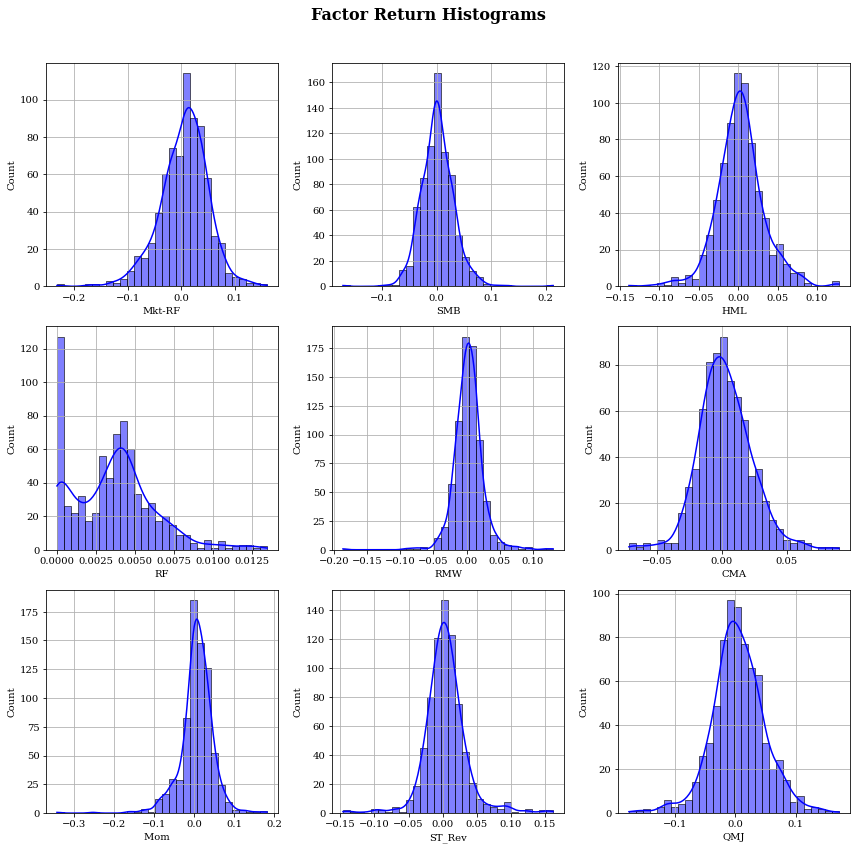

In [8]:
fig, axes = plt.subplots(3,3,figsize=(12,12))
axes = axes.flatten()

for i, col in enumerate(raw_data.columns):
    sns.histplot(raw_data[col],kde=True, bins=30, ax = axes[i],color='blue', edgecolor='black')
    axes[i].grid(True)
    
plt.tight_layout()
fig.suptitle("Factor Return Histograms",fontsize=16,fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [9]:
summary_stats = functions.summary_stats(raw_data, riskfree_rate=0)
summary_stats = summary_stats.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Historical VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary_stats = summary_stats.format(formatter="{:.3}",subset=["Sharpe Ratio","Skewness","Excess Kurtosis"])
summary_stats

,Annualized Return,Annualized Vol,Skewness,Excess Kurtosis,Historical VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Mkt-RF,5.9%,15.5%,-0.5,1.73,7.2%,10.1%,0.38,-55.7%
SMB,1.4%,10.6%,0.44,4.67,4.2%,5.9%,0.134,-54.8%
HML,2.9%,10.4%,0.0865,2.24,4.1%,6.3%,0.278,-58.4%
RF,4.4%,0.9%,0.655,0.719,-0.0%,-0.0%,4.87,0.0%
RMW,3.2%,7.7%,-0.276,10.9,2.8%,4.6%,0.416,-41.2%
CMA,2.9%,7.2%,0.272,1.45,2.7%,4.0%,0.407,-25.3%
Mom,6.4%,14.5%,-1.3,9.67,6.5%,10.3%,0.441,-57.6%
ST_Rev,4.9%,10.8%,0.461,5.69,3.5%,6.4%,0.452,-33.6%
QMJ,4.6%,15.3%,-0.069,1.48,6.4%,9.7%,0.297,-52.1%


I also calculate the factor return correlation and covariance matrix.

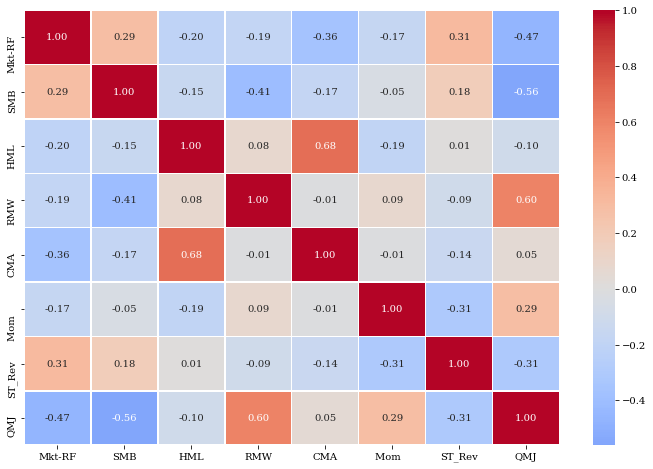

In [10]:
cor_matrix = raw_data.drop(columns=['RF']).corr()
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(cor_matrix, annot=True, cmap='coolwarm',center=0,fmt=".2f",linewidths=0.5)
plt.show()

In [11]:
cov_matrix = raw_data.drop(columns=['RF']).cov()*12
cov_matrix

,Mkt-RF,SMB,HML,RMW,CMA,Mom,ST_Rev,QMJ
Mkt-RF,0.024067,0.004826,-0.003293,-0.002216,-0.004025,-0.003829,0.005248,-0.011118
SMB,0.004826,0.011183,-0.001640,-0.003329,-0.001300,-0.000735,0.002075,-0.009079
HML,-0.003293,-0.001640,0.010775,0.000662,0.005104,-0.002930,0.000137,-0.001522
RMW,-0.002216,-0.003329,0.000662,0.005893,-0.000080,0.000951,-0.000762,0.007116
CMA,-0.004025,-0.001300,0.005104,-0.000080,0.005153,-0.000083,-0.001099,0.000586
Mom,-0.003829,-0.000735,-0.002930,0.000951,-0.000083,0.021144,-0.004858,0.006520
ST_Rev,0.005248,0.002075,0.000137,-0.000762,-0.001099,-0.004858,0.011742,-0.005086
QMJ,-0.011118,-0.009079,-0.001522,0.007116,0.000586,0.006520,-0.005086,0.023498


In [12]:
eigenvalues = np.linalg.eigvals(cov_matrix)
eigenvalues

array([0.04516192, 0.02200828, 0.01663424, 0.01050882, 0.00887734,
       0.0054823 , 0.00312107, 0.00165965])

Following are some observations:

- All the eigenvalues of the covariance matrix is positive, this shows the covariance matrix is positive definite. 
- Momentum factor has highest annualized return.
- The most volatile factor is the excess market return.
- Correlation among Fama-French 3 factors "Mkt-RF", "SMB", "HML" are small.
- Correlation between "HML" and "CMA" is high, indicating value companies tend to be more conservative in investment spending and growth company tend to be more aggressive in investment spending.
- Correlation between "QMJ" and "RMW" is high, indicating a robus operating profitable company tends to be high quality. In fact, AQR built this high quality factor based on companies' profitability.
- Correlation between "QMJ" and "SMB" is negatively correlated becasue large booking value companies usually have a high quality.
- Correlation between "ST_Rev" and "MoM" is low, as these two factors have opposite meanings. ST_Rev is long stocks with lowest past performance, whereas Momentum factor is long stocks with highest past performance.

## 2.2 Split Sample Period into pre-1993 and post-1993

In [13]:
raw_data_pre93 = raw_data['1963-07':'1993-12']
raw_data_pre93

,Mkt-RF,SMB,HML,RF,RMW,CMA,Mom,ST_Rev,QMJ
1963-07,-0.0039,-0.0045,-0.0097,0.0027,0.0068,-0.0118,0.0090,-0.0008,0.020621
1963-08,0.0507,-0.0098,0.0180,0.0025,0.0036,-0.0035,0.0101,0.0130,-0.024056
1963-09,-0.0157,-0.0033,0.0013,0.0027,-0.0071,0.0029,0.0019,0.0119,0.001689
1963-10,0.0253,-0.0058,-0.0010,0.0029,0.0280,-0.0201,0.0312,-0.0066,0.011333
1963-11,-0.0085,-0.0117,0.0175,0.0027,-0.0051,0.0224,-0.0074,0.0112,0.011044
...,...,...,...,...,...,...,...,...,...
1993-08,0.0371,0.0013,0.0013,0.0025,-0.0154,-0.0004,0.0265,0.0128,0.013998
1993-09,-0.0012,0.0304,-0.0031,0.0026,0.0024,-0.0016,0.0337,0.0069,-0.021840
1993-10,0.0141,0.0203,-0.0276,0.0022,0.0057,0.0060,-0.0272,0.0190,-0.011636
1993-11,-0.0189,-0.0125,-0.0074,0.0025,0.0223,-0.0094,-0.0474,-0.0139,0.026809


In [14]:
raw_data_post93 = raw_data['1994-01':]
raw_data_post93

,Mkt-RF,SMB,HML,RF,RMW,CMA,Mom,ST_Rev,QMJ
1994-01,0.0287,0.0034,0.0115,0.0025,-0.0166,0.0143,0.0000,0.0169,-0.060258
1994-02,-0.0255,0.0280,-0.0154,0.0021,0.0214,-0.0100,-0.0030,0.0036,0.024941
1994-03,-0.0478,-0.0108,0.0160,0.0027,0.0069,0.0128,-0.0127,0.0009,0.018120
1994-04,0.0068,-0.0093,0.0166,0.0027,0.0107,0.0111,0.0039,-0.0038,0.016158
1994-05,0.0058,-0.0215,0.0067,0.0031,0.0060,0.0068,-0.0219,0.0006,0.028264
...,...,...,...,...,...,...,...,...,...
2024-06,0.0277,-0.0306,-0.0331,0.0041,0.0051,-0.0178,0.0090,-0.0195,0.026932
2024-07,0.0124,0.0680,0.0574,0.0045,0.0022,0.0043,-0.0242,0.0347,-0.040088
2024-08,0.0161,-0.0355,-0.0113,0.0048,0.0085,0.0086,0.0479,-0.0017,0.039230
2024-09,0.0174,-0.0017,-0.0259,0.0040,0.0004,-0.0026,-0.0060,0.0056,-0.001662


In [15]:
summary_pre = functions.summary_stats(raw_data_pre93, riskfree_rate=0)
summary_pre = summary_pre.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Historical VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary_pre = summary_pre.format(formatter="{:.3}",subset=["Sharpe Ratio","Skewness","Excess Kurtosis"])
summary_pre

,Annualized Return,Annualized Vol,Skewness,Excess Kurtosis,Historical VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Mkt-RF,3.9%,15.5%,-0.395,2.49,7.0%,9.9%,0.252,-55.7%
SMB,2.9%,9.9%,0.158,1.22,4.1%,5.7%,0.297,-46.6%
HML,5.2%,9.0%,0.0194,1.06,3.6%,5.1%,0.577,-28.3%
RF,6.6%,0.8%,1.17,1.47,-0.3%,-0.2%,8.52,0.0%
RMW,2.1%,5.4%,0.00244,0.261,2.2%,3.1%,0.395,-23.7%
CMA,3.8%,6.6%,-0.0399,0.706,2.6%,3.7%,0.576,-17.6%
Mom,10.0%,11.9%,-0.511,2.25,5.7%,7.8%,0.845,-20.3%
ST_Rev,7.5%,8.8%,0.89,3.89,2.8%,4.1%,0.853,-22.2%
QMJ,1.7%,12.8%,-0.279,1.28,5.8%,8.0%,0.13,-52.1%


In [16]:
summary_post = functions.summary_stats(raw_data_post93, riskfree_rate=0)
summary_post = summary_post.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Historical VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary_post = summary_post.format(formatter="{:.3}",subset=["Sharpe Ratio","Skewness","Excess Kurtosis"])
summary_post

,Annualized Return,Annualized Vol,Skewness,Excess Kurtosis,Historical VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Mkt-RF,7.9%,15.5%,-0.606,1.03,7.8%,10.1%,0.509,-54.4%
SMB,-0.1%,11.2%,0.657,6.72,4.3%,6.0%,-0.00682,-41.3%
HML,0.7%,11.6%,0.176,2.27,4.6%,7.3%,0.0593,-58.4%
RF,2.4%,0.6%,0.318,-1.49,-0.0%,-0.0%,3.82,0.0%
RMW,4.3%,9.4%,-0.373,9.0,3.3%,5.8%,0.453,-41.2%
CMA,2.1%,7.7%,0.489,1.78,2.9%,4.2%,0.267,-25.3%
Mom,3.0%,16.8%,-1.44,9.76,7.8%,12.3%,0.176,-57.6%
ST_Rev,2.4%,12.5%,0.369,5.1,4.0%,8.2%,0.19,-33.6%
QMJ,7.5%,17.5%,-0.0575,1.06,7.1%,11.1%,0.429,-47.8%


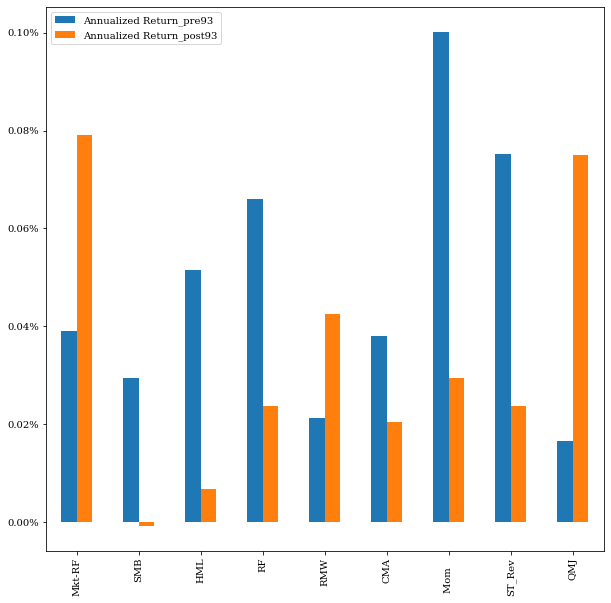

In [17]:
summary_pre = functions.summary_stats(raw_data_pre93, riskfree_rate=0)
summary_post = functions.summary_stats(raw_data_post93, riskfree_rate=0)
summary_all = pd.merge(summary_pre,summary_post,left_index=True,right_index=True,suffixes=('_pre93','_post93'))
summary_all[['Annualized Return_pre93','Annualized Return_post93']].plot.bar(figsize=(10,10))
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100,decimals=2)) 
plt.show()

- Only Mkt-RF, RMW and QMJ performed better post 1993 compared to pre 1993. 
- Annualized returns are significantly muted in other factors post 1993, which is expected due to investors discovering these strategies and driving down the alpha.
- RF annualized return is 4.2% lower in the post-1993 period.

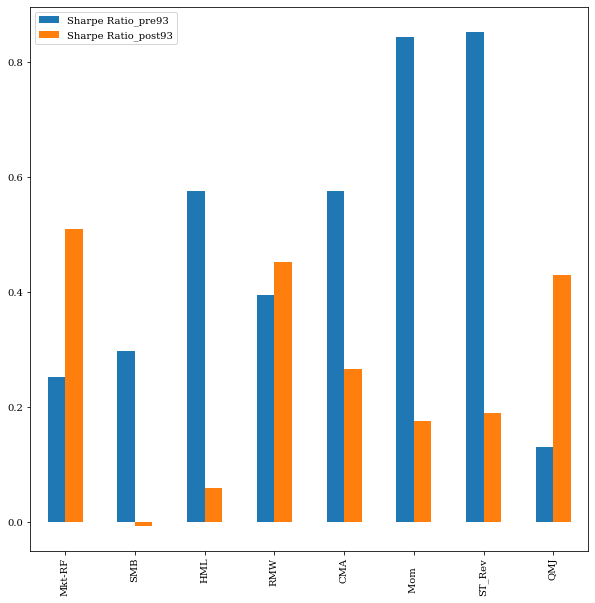

In [18]:
summary_all.drop(['RF'])[['Sharpe Ratio_pre93','Sharpe Ratio_post93']].plot.bar(figsize=(10,10))
plt.show()

- Only RMW and QMJ performed better post 1993 compared to pre 1993.
- SMB, HML, CMA, MoM, ST_Rev factors are less profitable post 1993 because of quant crowding, that many managers follow the same strategy, thus these factors become less profitable.

# 3. Portfolio Construction

## 3.1 Find the Max Sharpe Ratio Portfolio

Based on the above all period factor data, we calculate portfolio weights that would maximize its Sharpe ratio, assuming no short selling.

In [19]:
er = functions.annualize_rets(raw_data.drop(columns=['RF']), 12)
er

Mkt-RF    0.058999
SMB       0.014166
HML       0.028886
RMW       0.031918
CMA       0.029238
Mom       0.064084
ST_Rev    0.049015
QMJ       0.045538
dtype: float64

In [20]:
cov_matrix

,Mkt-RF,SMB,HML,RMW,CMA,Mom,ST_Rev,QMJ
Mkt-RF,0.024067,0.004826,-0.003293,-0.002216,-0.004025,-0.003829,0.005248,-0.011118
SMB,0.004826,0.011183,-0.001640,-0.003329,-0.001300,-0.000735,0.002075,-0.009079
HML,-0.003293,-0.001640,0.010775,0.000662,0.005104,-0.002930,0.000137,-0.001522
RMW,-0.002216,-0.003329,0.000662,0.005893,-0.000080,0.000951,-0.000762,0.007116
CMA,-0.004025,-0.001300,0.005104,-0.000080,0.005153,-0.000083,-0.001099,0.000586
Mom,-0.003829,-0.000735,-0.002930,0.000951,-0.000083,0.021144,-0.004858,0.006520
ST_Rev,0.005248,0.002075,0.000137,-0.000762,-0.001099,-0.004858,0.011742,-0.005086
QMJ,-0.011118,-0.009079,-0.001522,0.007116,0.000586,0.006520,-0.005086,0.023498


In [21]:
optimal_weights_MSR = pd.DataFrame(functions.msr(0, np.array(er), cov_matrix),index=er.index,columns=['Optimal Weight of MSR'])
optimal_weights_MSR = optimal_weights_MSR.style.format(formatter="{:.2%}",subset=["Optimal Weight of MSR"])
optimal_weights_MSR

,Optimal Weight of MSR
Mkt-RF,13.32%
SMB,11.87%
HML,4.31%
RMW,9.35%
CMA,24.51%
Mom,9.65%
ST_Rev,14.25%
QMJ,12.74%


In [22]:
return_MSR = functions.portfolio_return(functions.msr(0, np.array(er), cov_matrix), np.array(er))*100
vol_MSR = functions.portfolio_vol(functions.msr(0, np.array(er), cov_matrix), cov_matrix)*100
sharpe_MSR = return_MSR / vol_MSR
print("The return of the Maximized Sharpe Ratio Portfolio: %.2f%%" % return_MSR)
print("The vol. of the Maximized Sharpe Ratio Portfolio: %.2f%%" % vol_MSR)
print("The Sharpe Ratio of the Maximized Sharpe Ratio Portfolio: %.2f" % sharpe_MSR)

The return of the Maximized Sharpe Ratio Portfolio: 3.99%
The vol. of the Maximized Sharpe Ratio Portfolio: 3.08%
The Sharpe Ratio of the Maximized Sharpe Ratio Portfolio: 1.30


Next, we can plot the efficient frontier and Maximum Sharpe Ratio portfolio

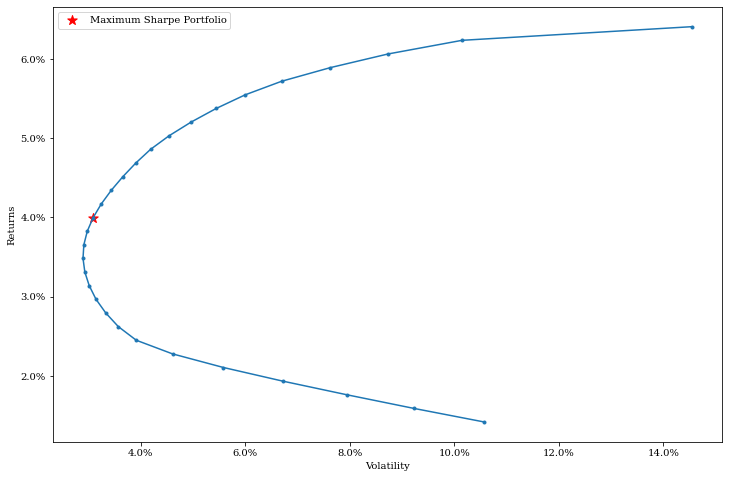

In [23]:
functions.plot_ef(30,np.array(er),cov_matrix,return_MSR/100,vol_MSR/100)
plt.show()

## 3.2 Target Volatility

If the portfolio targets an annualized volatility of 20%, it is necessary to take leverage to lever the tangential portfolio up to the required vol. The leverage required is:

In [24]:
20/vol_MSR

6.490189993260625

## 3.3 Time-Series Regression

Here I run a time-series regression of the HML portfolio returns on the monthly returns of the maximized Sharpe ratio portfolio.

In [25]:
optimal_weights_MSR = functions.msr(0, np.array(er), cov_matrix) 
optimal_weights_MSR

array([0.13319217, 0.11865112, 0.04314516, 0.09345998, 0.24514652,
       0.09654304, 0.14245851, 0.1274035 ])

In [26]:
optimal_portfolio_ret = raw_data.drop(columns=['RF']).dot(optimal_weights_MSR)
raw_data['optimal_portfolio'] = optimal_portfolio_ret
X = sm.add_constant(raw_data['optimal_portfolio'])
Y = raw_data['HML']
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HML   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     35.53
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           3.89e-09
Time:                        23:48:06   Log-Likelihood:                 1555.2
No. Observations:                 736   AIC:                            -3106.
Df Residuals:                     734   BIC:                            -3097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.467e-05      0.001      0.047      0.963      -0.002       0.002
optimal_portfolio     0.7238      0.121      5.961      0.000       0.485       0.962
==============================================================================
Omnibus:                       31.845   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.990
Skew:                           0.062   Prob(JB):                     2.88e-20
Kurtosis:                       4.709   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept is nearly 0 and the t-statistics is 0.047 for the intercept, indicating the coefficient is not statistically significant different from 0. This indicates that when the optimal portfolio has a return of 0, the HML portfolio is likely to be around 0 as well. The MSR portfolio should "dominate" portfolios made up of any other linear combination of the assets and hence any other portfolio will have 0 "alpha" relative to the MSR portfolio.